In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
students = pd.read_csv(r"C:\Users\pihu\Downloads\students.csv")
course_activity = pd.read_csv(r"C:\Users\pihu\Downloads\course_activity.csv")
feedback = pd.read_csv(r"C:\Users\pihu\Downloads\feedback.csv")

In [21]:
# inspect the data
students.info()
students.describe()
students.head()

course_activity.info()
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    object        
 4   Location        100 non-null    object        
 5   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Student_ID             659 non-null    object        
 1   Course_ID              659 non-null    object        
 2   Date                   659 non-null    datetime64[ns]
 3   Time_Spe

In [ ]:
#handle missing and duplicate values
students.drop_duplicates(inplace=True)
course_activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)

students.isnull().sum()
course_activity.isnull().sum()
feedback.isnull().sum()

In [13]:
#Convert data types
students['Enrolment_Date']=pd.to_datetime(students['Enrolment_Date'])
course_activity['Date']=pd.to_datetime(course_activity['Date'],format='%d/%m/%Y', errors='coerce')

In [14]:
#Exploratory Data Analysis

In [15]:
#overall average completion rate
overall_completion = course_activity['Completion_Percentage'].mean()
print(overall_completion)

54.77871016691957


In [52]:
#highest and lowest average engagement time
course_engagement=course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean()
highest_avg_time = course_engagement.max()
lowest_avg_time = course_engagement.min()
print(highest_avg_time)
print(lowest_avg_time)

102.42767295597484
93.90243902439025


In [17]:
#Engagement by agegroup and location
merged = course_activity.merge(students, left_on='Student_ID', right_on='Student_ID')
Engagement_by_AgeGroup = merged.groupby('Age')['Time_Spent_Minutes'].mean()
Engagement_by_Location = merged.groupby('Location')['Time_Spent_Minutes'].mean()
print(Engagement_by_AgeGroup)
print(Engagement_by_Location)

Age
18    107.102041
19    100.619048
20     92.051724
21    118.062500
22    104.464286
23     81.384615
24     95.137931
25    102.910714
26    105.405405
27     94.470588
28     94.137931
29     90.000000
30    101.578947
31    104.551724
32     94.746032
33     92.321429
34     84.727273
Name: Time_Spent_Minutes, dtype: float64
Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64


In [18]:
# Average feedback rating
avg_rating=feedback.groupby('Course_ID')['Rating'].mean()
print(avg_rating)

Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64


Text(0.5, 1.0, 'Completion_Percentage vs Rating')

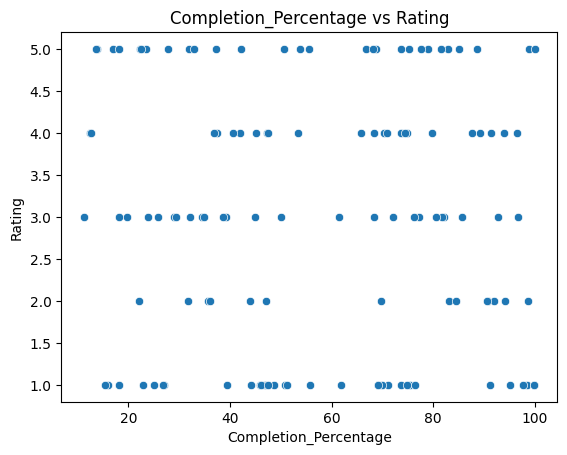

In [27]:
# correlation between completion rate and feedback rating
merged_fb= course_activity.merge(feedback, on=['Student_ID', 'Course_ID'])
sns.scatterplot(data=merged_fb, x='Completion_Percentage', y='Rating')
plt.title('Completion_Percentage vs Rating')

In [35]:
#top three segments
merged_all = merged_fb.merge(students, left_on='Student_ID', right_on='Student_ID')
segments = merged_all.groupby(['Age', 'Location']).agg({
    'Time_Spent_Minutes': 'mean',
    'Rating': 'mean'
}).sort_values(by=['Time_Spent_Minutes', 'Rating'], ascending=False).head(3)
print (segments)

               Time_Spent_Minutes  Rating
Age Location                             
24  Bangalore               174.0     4.0
30  Bangalore               173.0     4.0
    Delhi                   167.0     1.0


In [36]:
# Visualisations

Text(0.5, 1.0, 'Average Engagement time by course')

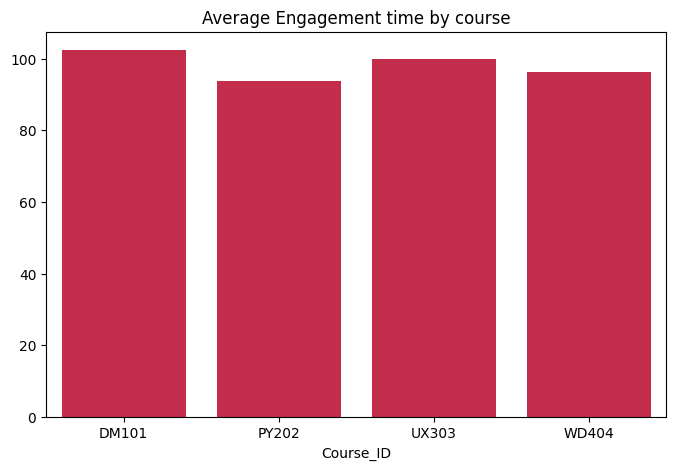

In [46]:
#Engagement pattern by course
plt.figure(figsize=(8,5))
sns.barplot(x=course_engagement.index, y=course_engagement.values,color='Crimson')
plt.title('Average Engagement time by course')

Text(0.5, 1.0, 'Feedback ratings per course')

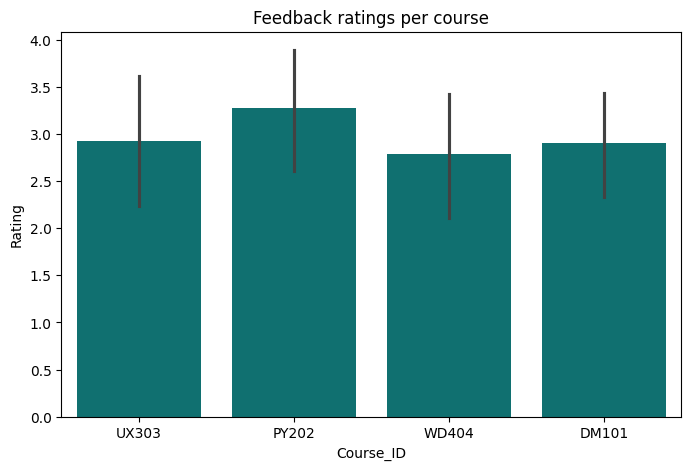

In [47]:
# feedback ratings per course
plt.figure(figsize=(8,5))
sns.barplot(x='Course_ID', y='Rating', data=feedback,color='Teal')
plt.title('Feedback ratings per course')

<Axes: title={'center': 'Average engagement over time'}, xlabel='Date'>

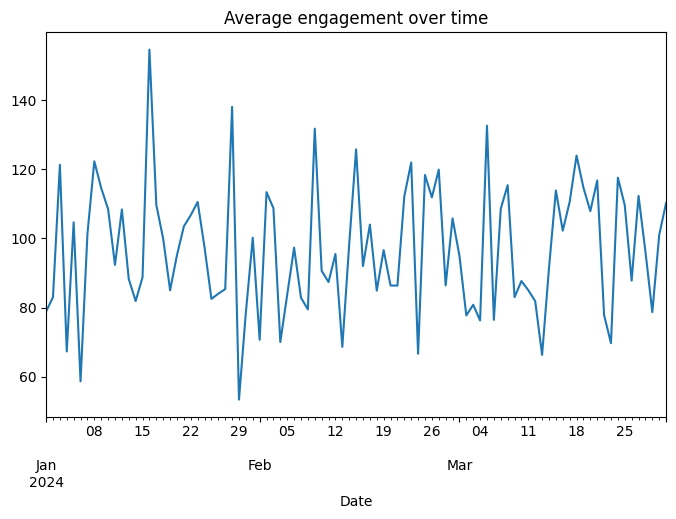

In [51]:
#highlight trends over time
time_trend=course_activity.groupby('Date')['Time_Spent_Minutes'].mean()
time_trend.plot(title='Average engagement over time',figsize=(8,5))

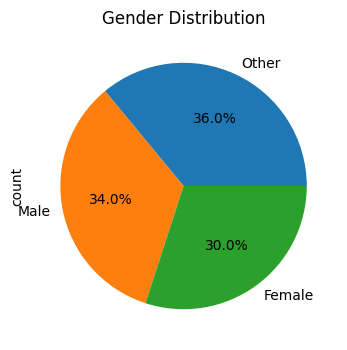

In [58]:
# Gender Distribution 
plt.figure(figsize=(6,4))
students['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()